In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
def show_img(img):
    plt.figure(figsize=(15,15)) 
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [3]:
def reduce_highlights(img, highlight_threshold=127):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 先轉成灰階處理
    ret, thresh = cv2.threshold(img_gray, highlight_threshold, 255, 0)  # 利用 threshold 過濾出高光的部分，目前設定高於 200 即為高光
    contours, hierarchy  = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_zero = np.zeros(img.shape, dtype=np.uint8) 
    
#     print(len(contours))

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour) 
        img_zero[y:y+h, x:x+w] = 255 
        mask = img_zero 

    print("Highlight part: ")
    show_img(mask)
    
    # alpha，beta 共同決定高光消除後的模糊程度
    # alpha: 亮度的缩放因子，默認是 0.2， 範圍[0, 2], 值越大，亮度越低
    # beta:  亮度缩放後加上的参数，默認是 0.4， 範圍[0, 2]，值越大，亮度越低
    result = cv2.illuminationChange(img, mask, alpha=0.2, beta=0.2) 
#     show_img(result)
        
    return result

In [4]:
def img_processing(img):
    # do something here
    result_img = reduce_highlights(img)
    
    return result_img
    

origin picture:


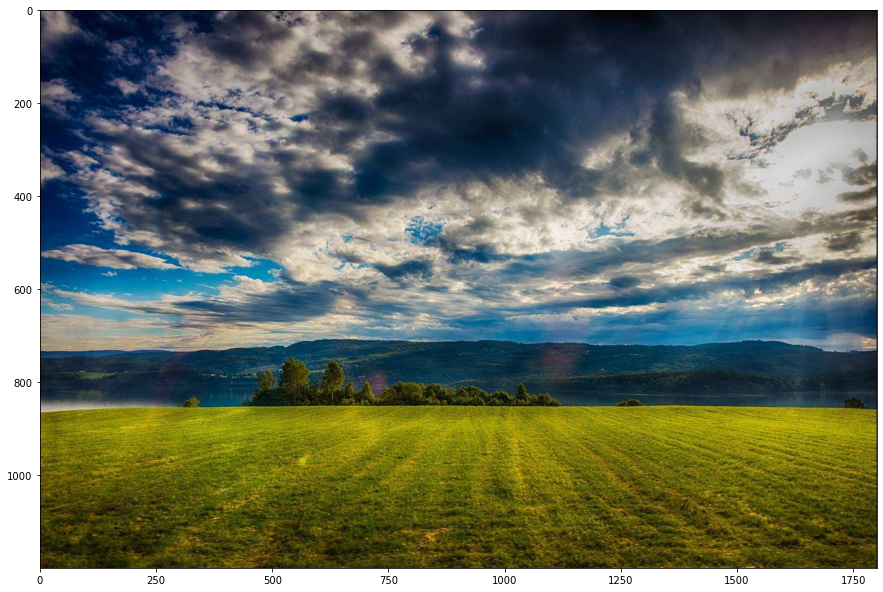

Highlight part: 


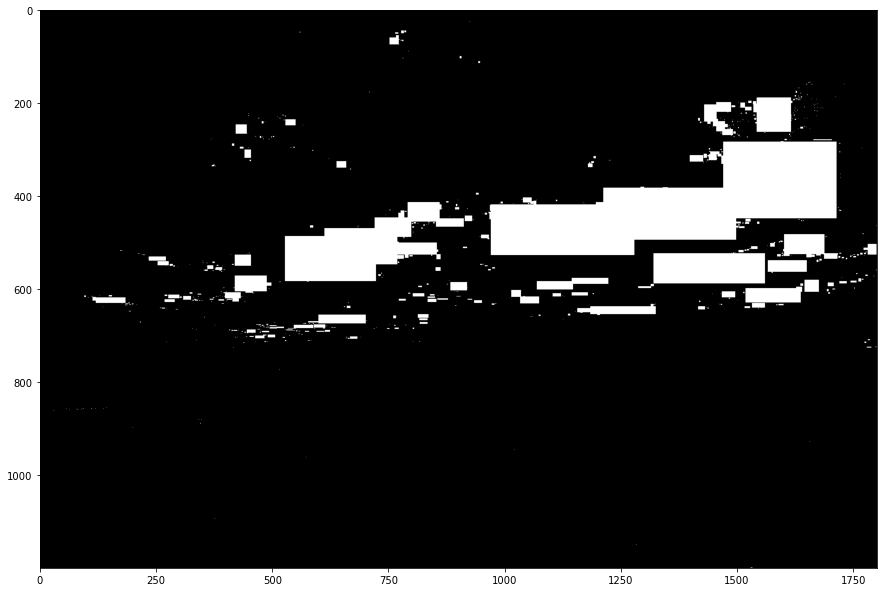

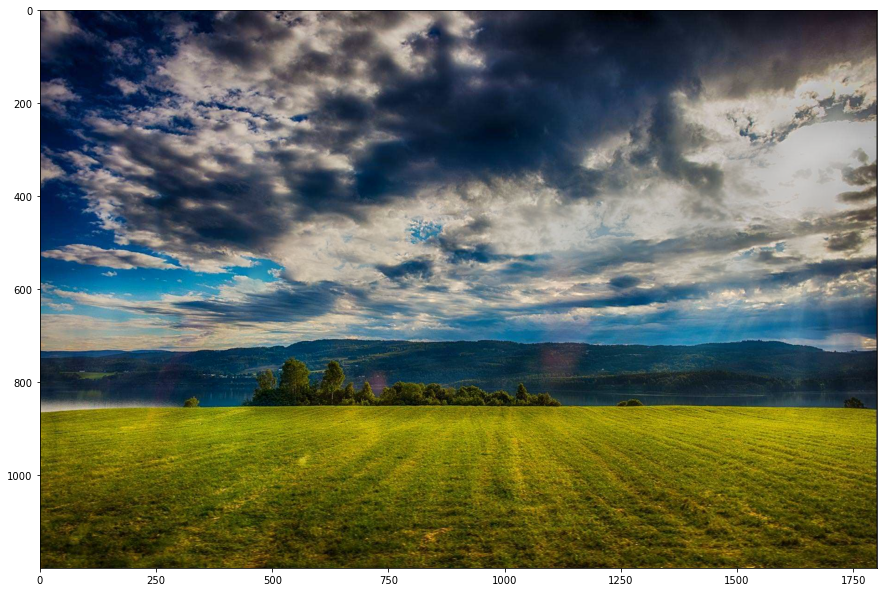

In [5]:
file_name = "./testdata/scenery.jpg"
origin_img = cv2.imread(file_name)
print("origin picture:")
show_img(origin_img)

result_img = img_processing(origin_img)
show_img(result_img)

# Reference

https://blog.csdn.net/qq_43555843/article/details/102510425

https://blog.csdn.net/fangyan90617/article/details/100533808

https://zhuanlan.zhihu.com/p/26889255

https://shawnzhang31.com/topic/opencvtutorial/PhotoModule/SeamlessCloning/SeamlessCloning.html

https://www.twblogs.net/a/5b8a7d612b71775d1ce753a8
